In [47]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,array_to_img
import cv2
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
import glob
from sklearn.metrics import accuracy_score,f1_score,precision_score,confusion_matrix,recall_score
import seaborn as sns

In [50]:
path_test='C:\\Users\\DELL\\Desktop\\photos'

In [7]:
pa= "C:\\Users\DELL\Desktop\images_train"

In [51]:
 photo_images=[]


for filepath in os.listdir(path_test):
            photo_path=os.path.join(path_test,filepath)
            photo=cv2.imread(photo_path)
            photo=cv2.cvtColor(photo,cv2.COLOR_BGR2RGB)
            photo=cv2.resize(photo,(256,256))
            photo_images.append(photo)




photo_images=np.array(photo_images)

In [ ]:
plt.imshow(photo_images[5])

In [8]:
def preparData(path):
    imagsList = []
    labels = []
    for dic in sorted(glob.glob(os.path.join(path,'*')), key = lambda k: k.split('/')[-1]):
        folder_name = os.path.basename(dic)
        for imgs in glob.glob(os.path.join(dic, '*.png')):
            img = cv2.imread(imgs)
         
            if img is None:
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   
            img_r = cv2.resize(img, (256, 256))
            imagsList.append(img_r)
            labels.append(int(folder_name))
    X_train, X_test, y_train, y_test = train_test_split(imagsList, labels,train_size=0.7,shuffle= True)
    y_train = to_categorical(y_train)
    y_test  = to_categorical(y_test)

    return np.array(X_train), np.array(X_test), y_train, y_test

In [9]:
X_train, X_test, Y_train,Y_test = preparData(pa)

In [18]:
x_test, x_vaidation, y_test, y_validation = train_test_split( X_test,Y_test , test_size=0.7,shuffle= True, random_state = 0)

In [19]:
len(X_train)

6563

In [20]:
len(x_test)

843

In [21]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {Y_train.shape}")

print(f"X_test shape:  {x_test.shape}")
print(f"y_test shape:  {y_test.shape}")

print(f"X_validation shape:  {x_vaidation.shape}")
print(f"y_validation shape:  {y_validation.shape}")

X_train shape: (6563, 256, 256, 3)
y_train shape: (6563, 188)
X_test shape:  (843, 256, 256, 3)
y_test shape:  (843, 188)
X_validation shape:  (1970, 256, 256, 3)
y_validation shape:  (1970, 188)


In [14]:
len(Y_train)

6563

In [22]:

model= models.Sequential()
model.add(layers.InputLayer(input_shape=(256, 256, 3)))

model.add(layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size = (2,2)))


model.add(layers.Conv2D(filters = 64,kernel_size = (5,5),activation = 'relu'))
model.add(layers.MaxPool2D(pool_size = (2,2)))
model.add(layers.Dropout(0.10))

model.add(layers.Conv2D(filters = 128,kernel_size = (5,5),activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size = (2,2)))


model.add(layers.Conv2D(filters = 256,kernel_size = (5,5),activation = 'relu'))
model.add(layers.MaxPool2D(pool_size = (2,2)))
model.add(layers.Dropout(0.15))

model.add(layers.Conv2D(filters = 512,kernel_size = (5,5),activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size = (2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(rate=0.20))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(188,activation='softmax'))

In [23]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:

history = model.fit(X_train,Y_train, e,pochs=10, batch_size=32,validation_data=( x_vaidation, y_validation))
# number of epochs=15

Epoch 1/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 1183s 5s/step - accuracy: 0.0350 - loss: 5.2534 - val_accuracy: 0.0188 - val_loss: 5.4001
Epoch 2/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 753s 4s/step - accuracy: 0.2454 - loss: 3.1348 - val_accuracy: 0.3041 - val_loss: 2.7752
Epoch 3/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 802s 4s/step - accuracy: 0.5432 - loss: 1.7104 - val_accuracy: 0.2152 - val_loss: 3.9172
Epoch 4/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 778s 4s/step - accuracy: 0.8106 - loss: 0.6735 - val_accuracy: 0.6360 - val_loss: 1.2705
Epoch 5/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 814s 4s/step - accuracy: 0.9101 - loss: 0.3270 - val_accuracy: 0.7746 - val_loss: 0.7385
Epoch 6/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 747s 4s/step - accuracy: 0.9386 - loss: 0.2344 - val_accuracy: 0.8756 - val_loss: 0.4207
Epoch 7/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 737s 4s/step - accuracy: 0.9579 - loss: 0.1677 - val_accuracy: 0.8888 - val_loss: 0.3529
Epoch 8/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 746s 4s/step - accuracy: 0.9742 - loss: 0.1007 - val_acc

In [25]:
acc,loss=model.evaluate(X_train, Y_train)

206/206 ━━━━━━━━━━━━━━━━━━━━ 258s 1s/step - accuracy: 0.9793 - loss: 0.0771


In [26]:
acc,loss=model.evaluate(x_test, y_test)


27/27 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9377 - loss: 0.2528


In [27]:
y_pred=model.predict(x_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step


In [28]:
y_pred

array([[1.11564265e-10, 4.09957668e-09, 3.27570526e-10, ...,
        6.75004705e-11, 4.49691981e-08, 7.64923641e-07],
       [3.04417335e-04, 5.19373920e-04, 6.50378715e-05, ...,
        3.55065595e-07, 1.27274965e-04, 1.18894252e-06],
       [8.07167031e-03, 2.68878412e-05, 1.21173471e-07, ...,
        2.08533741e-08, 6.88549392e-07, 1.09209111e-06],
       ...,
       [6.62847469e-07, 3.35234495e-06, 3.67924804e-04, ...,
        2.62715472e-09, 1.50031709e-10, 2.93680756e-07],
       [4.98551417e-17, 6.06181882e-16, 3.00818748e-16, ...,
        2.08760968e-15, 1.98554094e-14, 4.73501294e-10],
       [3.03961474e-06, 1.28850428e-04, 8.85455279e-07, ...,
        4.24542371e-03, 1.78294576e-05, 1.26996902e-05]], dtype=float32)

In [39]:
precision = precision_score(y_test, y_pred, average='micro')

In [40]:
precision

0.933570581257414

<Axes: >

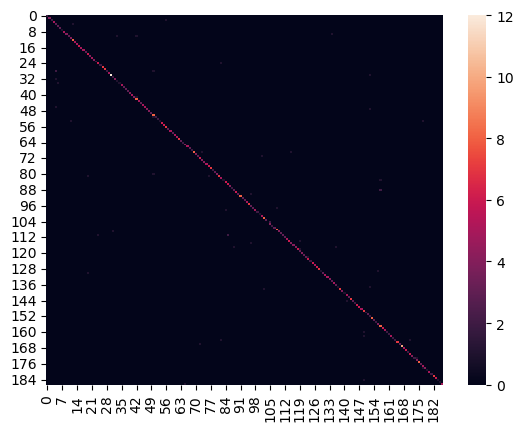

In [41]:
c=confusion_matrix(y_test,y_pred)
sns.heatmap(c)

In [43]:
pre=precision_score(y_pred,y_test,average='micro')
pre

0.933570581257414

In [45]:
f=f1_score(y_pred,y_test,average='micro')
f

0.933570581257414

In [49]:
r=recall_score(y_pred,y_test,average='micro')
r

0.933570581257414

27/27 - 27s - 1s/step - accuracy: 0.9336 - loss: 0.2589


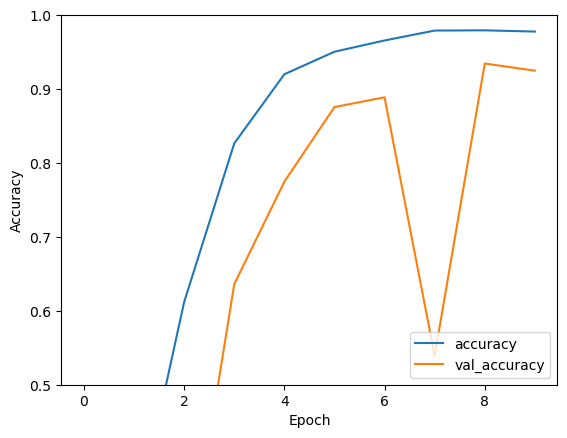

In [34]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)

Test By Data

In [52]:
input_img = np.expand_dims(photo_images[8], axis=0)

# استخدم النموذج للتنبؤ بالتصنيف
prediction = model.predict(input_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step


In [53]:
class_index = np.argmax(prediction)

In [54]:
print(class_index)

8


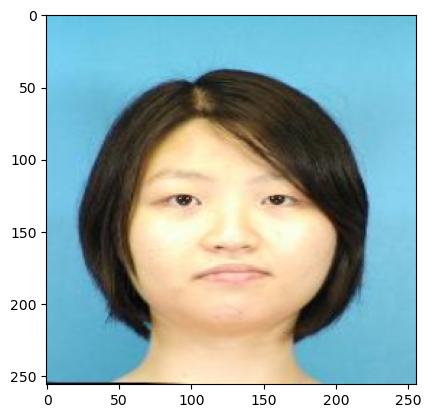

In [55]:
plt.imshow(photo_images[8])

In [74]:
input_img = np.expand_dims(photo_images[6], axis=0)

# استخدم النموذج للتنبؤ بالتصنيف
prediction = model.predict(input_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


In [75]:
class_inde = np.argmax(prediction)

In [76]:
print(class_inde)

6


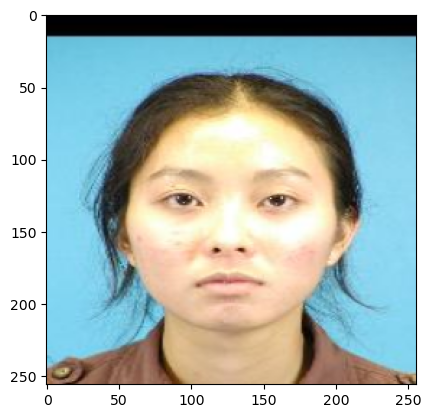

In [77]:
plt.imshow(photo_images[6])

In [60]:
a='C:\\Users\DELL\Desktop\original_dataset\photos\\f-031-01.jpg'

In [61]:
photo=cv2.imread(a)
photo=cv2.cvtColor(photo,cv2.COLOR_BGR2RGB)
photo=cv2.resize(photo,(256,256))




In [62]:
input_img = np.expand_dims(photo, axis=0)

# استخدم النموذج للتنبؤ بالتصنيف
prediction = model.predict(input_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step


In [63]:
class_inde = np.argmax(prediction)

In [64]:
print(class_inde)

26


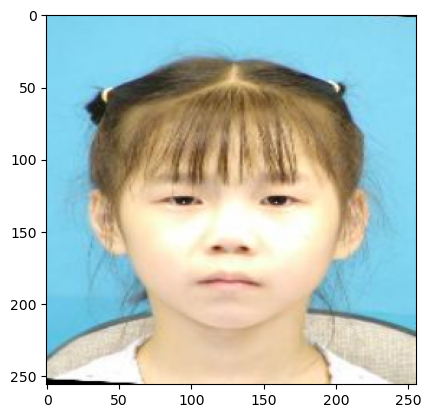

In [65]:
plt.imshow(photo)

In [99]:
model.save('my_model.keras')

In [103]:
model.save('my_model.h5')

In [110]:
model.save('C:\\Users\DELL\Desktop\S\custom_model.h5')

In [109]:
model.save('my_model.keras')